In [1]:
import os, sys
sys.path.append( os.path.join('..', '..'))

import numpy as np
import matplotlib.pyplot as plt

# my own modules
from src.solver import Schrodinger_solver1D as solver1D
from src.model import potential 

# Single Quantum Well

In [2]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-20, 20, 1000) # cm
V_fun = lambda x: potential.finite_wells_potential(x=x, x_range=[-2, 2], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

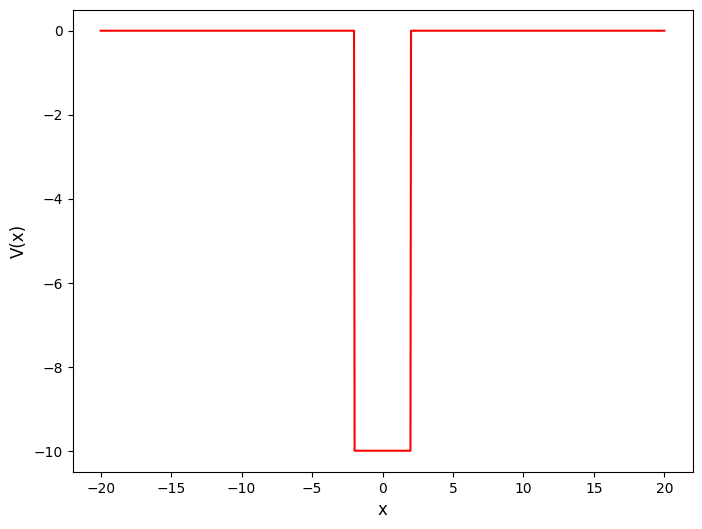

In [3]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'Wavefunctions and Potential Energy'}, xlabel='x'>

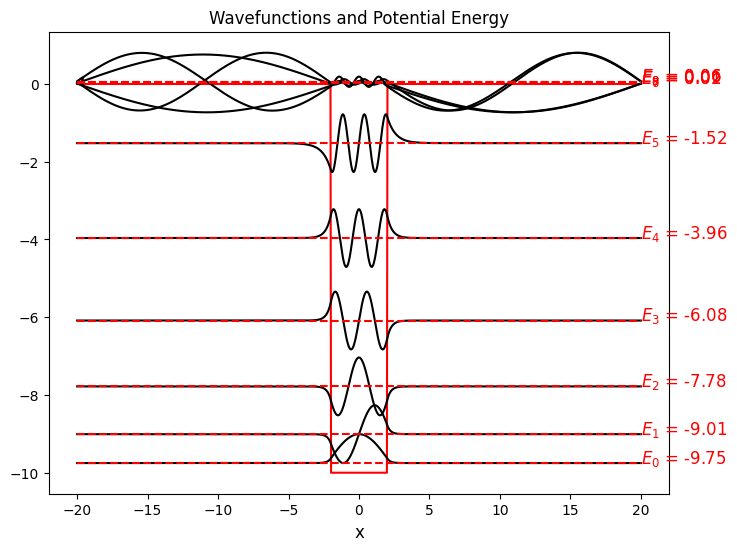

In [4]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 10, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=E[1] - E[0])
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$ = {E[i]:.2f}' for i in range(E.size)])

Interestingly, when it is an even quantum number, the wavefunction is symmetric but when it is an odd number, the wavefunctions would become anti-symmetric. <br>

Theoretically, when E is larger than the well height, the energy should not be quantized. However, in the simulation, we set the wave functions at the boundary is always zero. This would be like another infinite well out of the simulation boundary. Therefore, a quantized energy would also be observed in the unbounded in this cases. Besides, the grid size would also influence but in this case the dominant term is the boundary conditions.


# Two Quantum Wells

In [5]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-20, 20, 1000) # cm
V_fun = lambda x: potential.finite_wells_potential(x=x, x_range=[ [-6, -2], [2,6] ], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

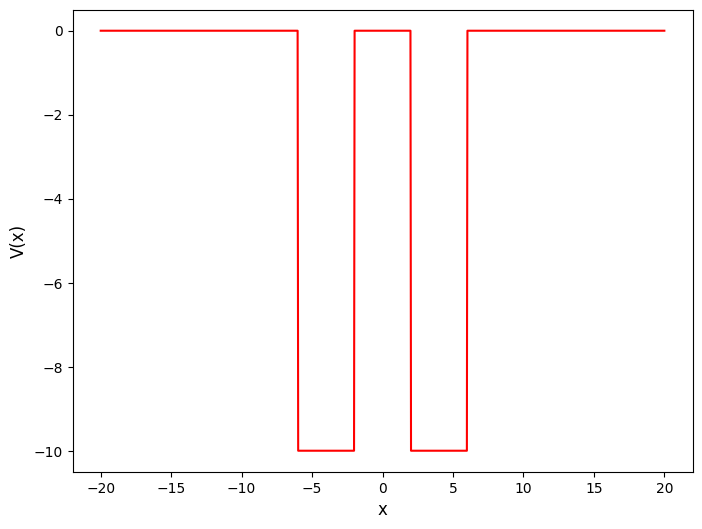

In [6]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'anti-bonding / E = -9.75'}, xlabel='x'>

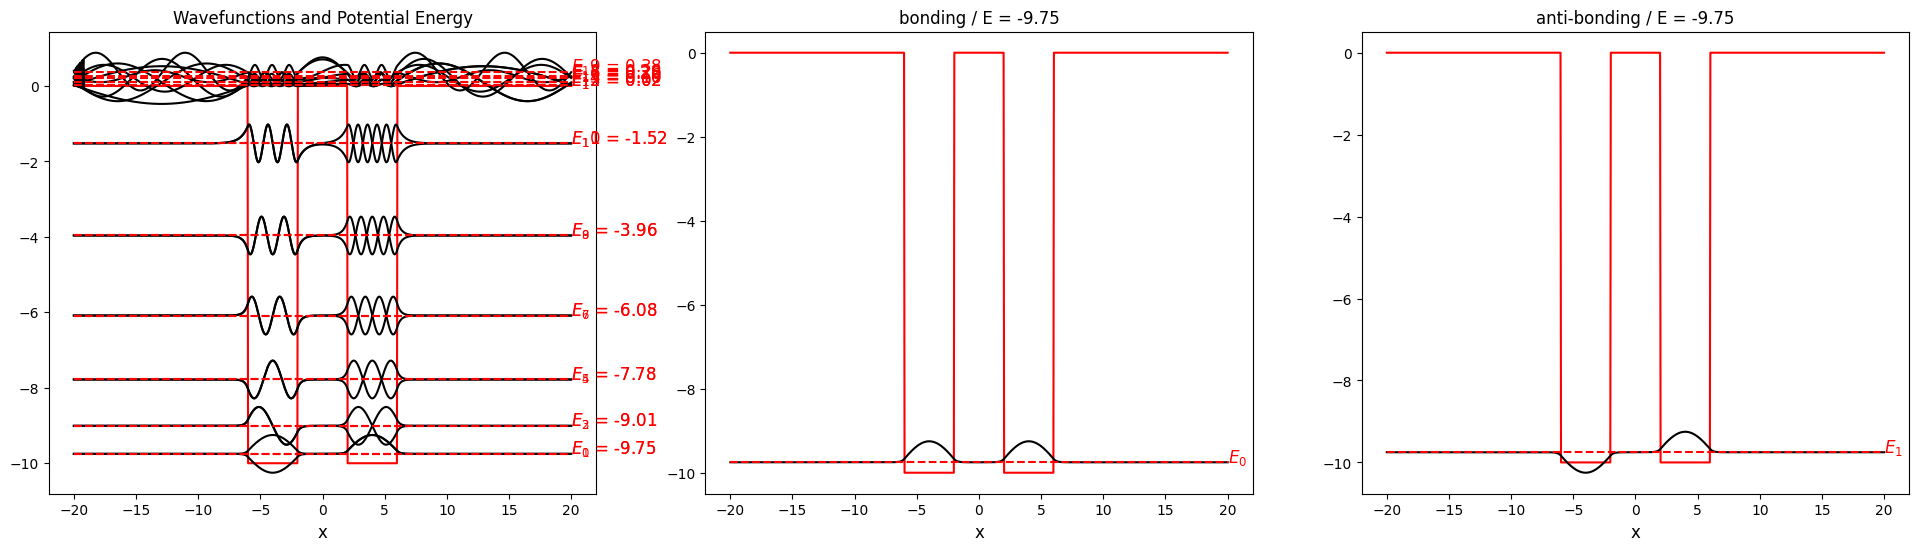

In [7]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 20, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(1, 3, figsize=(8*3, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$ = {E[i]:.2f}' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[0]], [Psis[0]], V_fun(x), labels = [f'$E_0$',], ax = ax[1], title = f'bonding / E = {E[0]:.2f}')
solver1D.plot_wavefunctions_and_potential(x, [E[1]], [Psis[1]], V_fun(x), labels = [f'$E_1$',], ax = ax[2], title = f'anti-bonding / E = {E[1]:.2f}')

Because of the highly symmetric of potential energy, there would be two degenerate states of each energy level, including bonding and anti-bonding cases.

# Two Quantum Wells / Unbalanced

In [8]:
""" setting """
m = 1
V0 = 0
V1 = -10
V2 = -8
h_bar = 1

x = np.linspace(-20, 20, 1000) # cm
V_fun = lambda x: potential.finite_wells_potential(x=x, x_range = [-6, -2], V0=V0, V1 = V1) + potential.finite_wells_potential(x=x, x_range = [2, 6], V0=V0, V1 = V2)

<Axes: xlabel='x', ylabel='V(x)'>

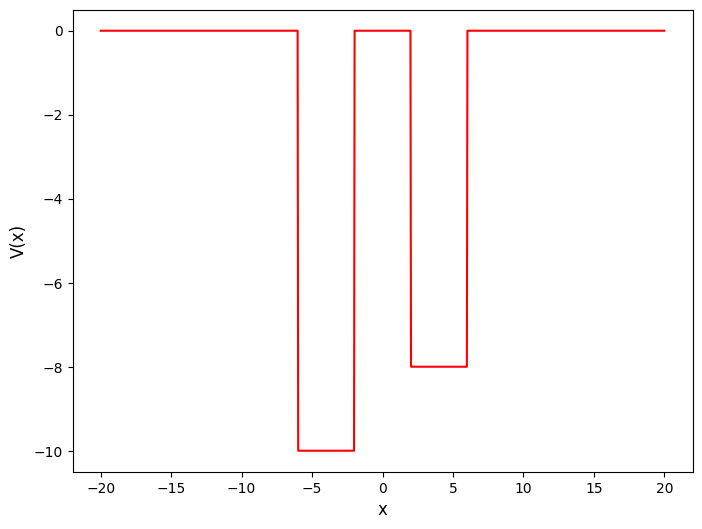

In [9]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'E = -7.76'}, xlabel='x'>

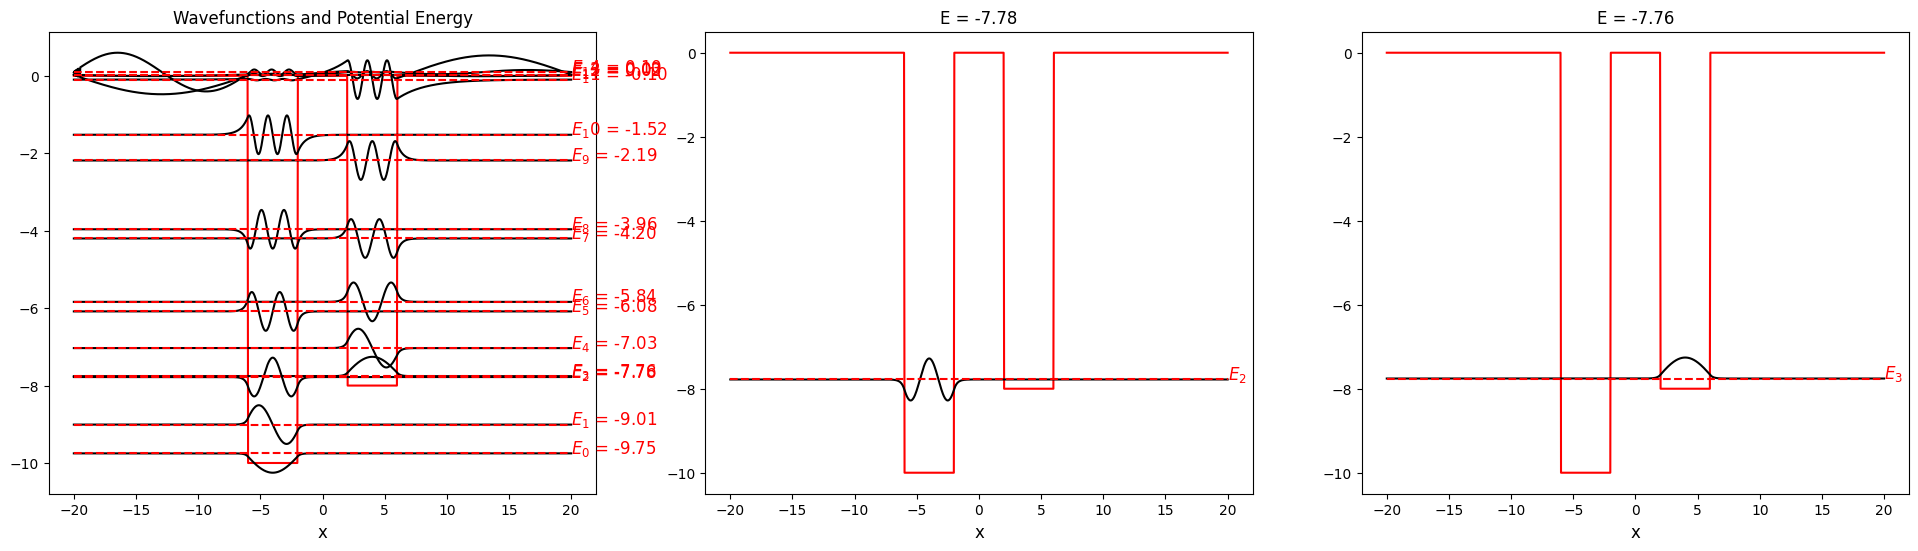

In [10]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 15, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(1, 3, figsize=(8*3, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$ = {E[i]:.2f}' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[2]], [Psis[2]], V_fun(x), labels = [f'$E_2$',], ax = ax[1], title = f'E = {E[2]:.2f}')
solver1D.plot_wavefunctions_and_potential(x, [E[3]], [Psis[3]], V_fun(x), labels = [f'$E_3$',], ax = ax[2], title = f'E = {E[3]:.2f}')

The unsymmetric potential energy would break down the degenerate states. However, $E_2$ and $E_3$ are still degenerate. The user can change the height and the width of one quantum well. Then, the user could find that this degerate states will also be broken.

# Two Quantum Wells / Unbalanced

In [11]:
""" setting """
m = 1
V0 = 0
V1 = -10
V2 = -8
h_bar = 1

x = np.linspace(-20, 20, 1000) # cm
V_fun = lambda x: potential.finite_wells_potential(x=x, x_range = [-6, -2], V0=V0, V1 = V1) + potential.finite_wells_potential(x=x, x_range = [2, 5.], V0=V0, V1 = V2)

<Axes: xlabel='x', ylabel='V(x)'>

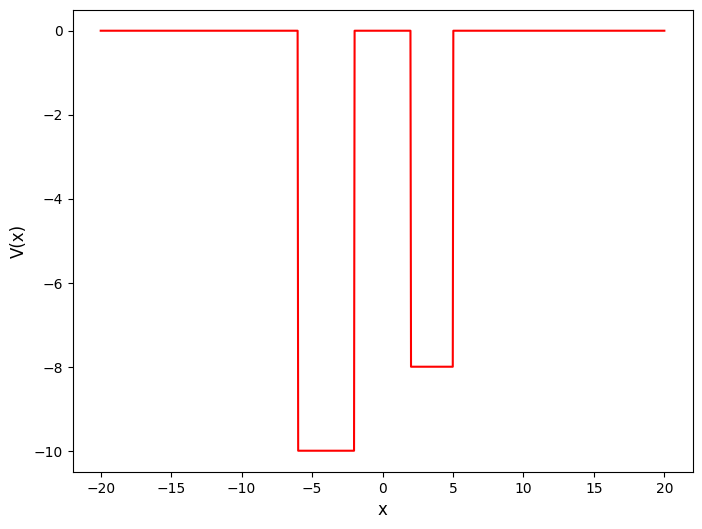

In [12]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'E = -7.60'}, xlabel='x'>

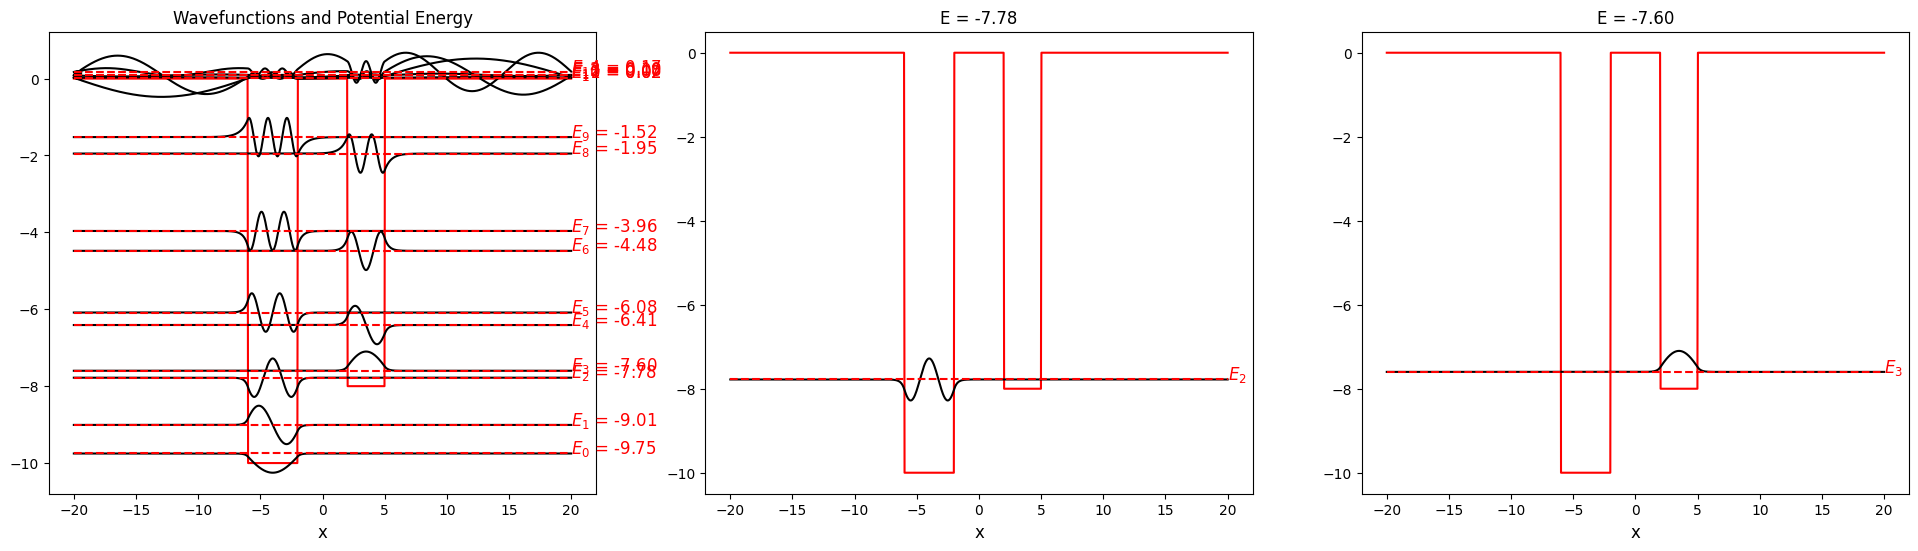

In [13]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 15, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(1, 3, figsize=(8*3, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$ = {E[i]:.2f}' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[2]], [Psis[2]], V_fun(x), labels = [f'$E_2$',], ax = ax[1], title = f'E = {E[2]:.2f}')
solver1D.plot_wavefunctions_and_potential(x, [E[3]], [Psis[3]], V_fun(x), labels = [f'$E_3$',], ax = ax[2], title = f'E = {E[3]:.2f}')

This case is similar to the previous case but with different right-hand-side (RHS) well width. In the previous case, two well are with the same width of 4 but in this case one width is still keep as 4 and the other width is 3. This would cause the the degenerated state ($E_2& and $E_3$ in the previous case) would be split.

# Triple Quantum Wells 

In [14]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-20, 20, 1000) # cm
V_fun = lambda x: potential.finite_wells_potential(x=x, x_range=[ [-10, -6], [-2,2], [6,10] ], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

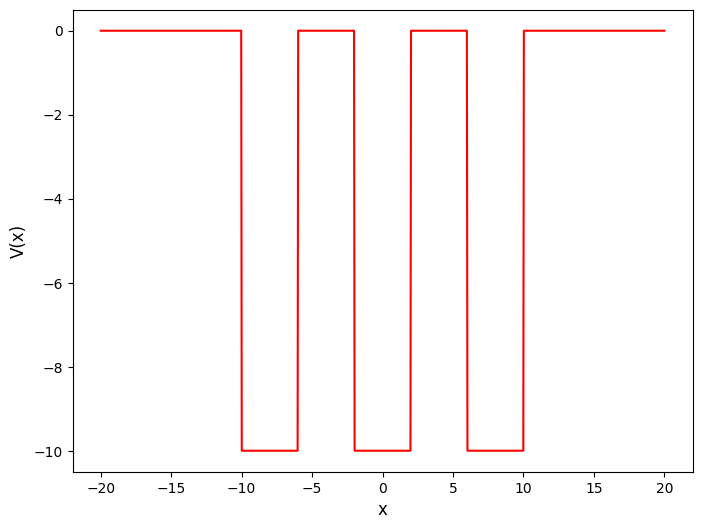

In [15]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'state 17 - bonding / E = -1.52'}, xlabel='x'>

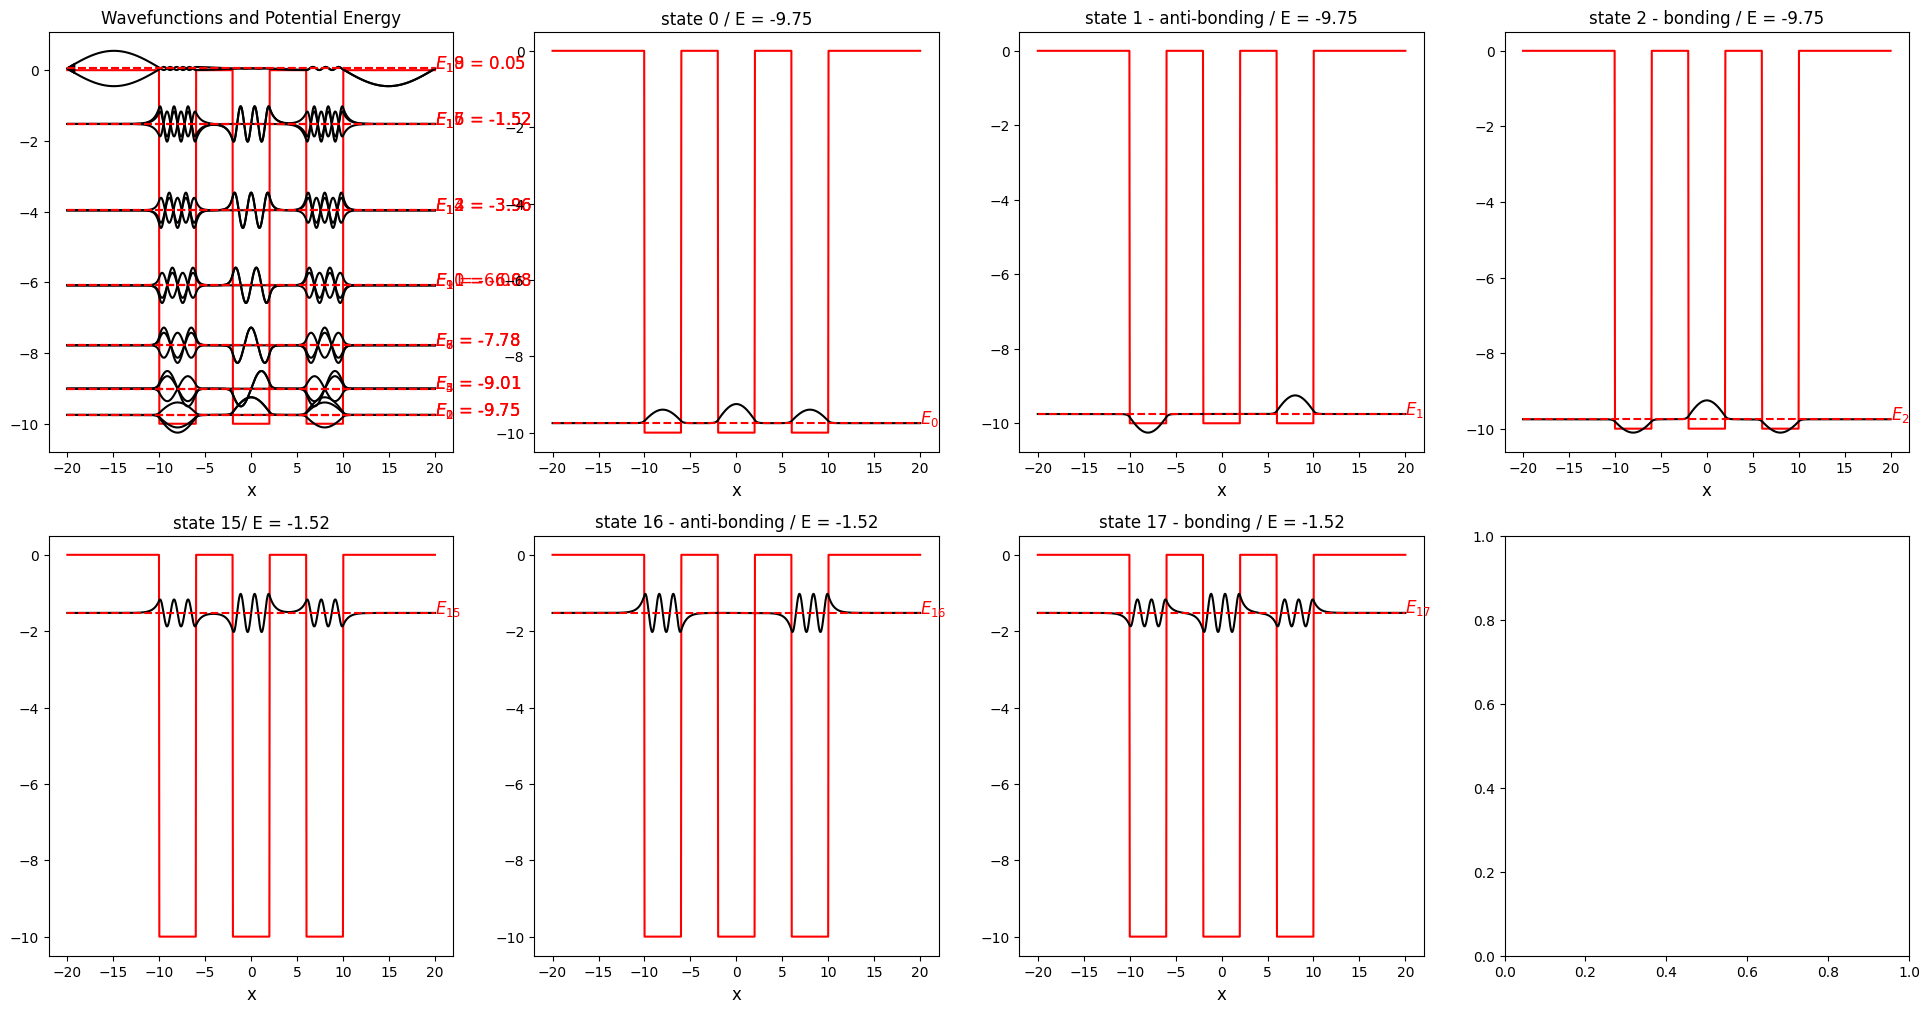

In [16]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 20, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(2, 4, figsize=(8*3, 6*2))
ax = ax.flatten()
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$ = {E[i]:.2f}' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[0]], [Psis[0]], V_fun(x), labels = [f'$E_0$',], ax = ax[1], title = f'state 0 / E = {E[0]:.2f}')
solver1D.plot_wavefunctions_and_potential(x, [E[1]], [Psis[1]], V_fun(x), labels = [f'$E_1$',], ax = ax[2], title = f'state 1 - anti-bonding / E = {E[1]:.2f}')
solver1D.plot_wavefunctions_and_potential(x, [E[2]], [Psis[2]], V_fun(x), labels = [f'$E_2$',], ax = ax[3], title = f'state 2 - bonding / E = {E[2]:.2f}')
solver1D.plot_wavefunctions_and_potential(x, [E[15]], [Psis[15]], V_fun(x), labels = ['$E_{15}$',], ax = ax[4], title = f'state 15/ E = {E[15]:.2f}')
solver1D.plot_wavefunctions_and_potential(x, [E[16]], [Psis[16]], V_fun(x), labels = ['$E_{16}$',], ax = ax[5], title = f'state 16 - anti-bonding / E = {E[16]:.2f}')
solver1D.plot_wavefunctions_and_potential(x, [E[17]], [Psis[17]], V_fun(x), labels = ['$E_{17}$',], ax = ax[6], title = f'state 17 - bonding / E = {E[17]:.2f}')

Because there are three quantum, the degenrate states number of each energy level would become 3. One state is distributed in the center well and the other states are distributed in the left and right well, which cause these states are orthogonal to each other.

# Multiple Well

In [17]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-40, 40, 1000) # cm

x_range = [ [-34, -30], [-26, -22], [-18, -14], [-10, -6], [-2,2], [6,10], [14,18], [22,26], [30,34] ]
V_fun = lambda x: potential.finite_wells_potential(x=x, x_range=x_range , V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

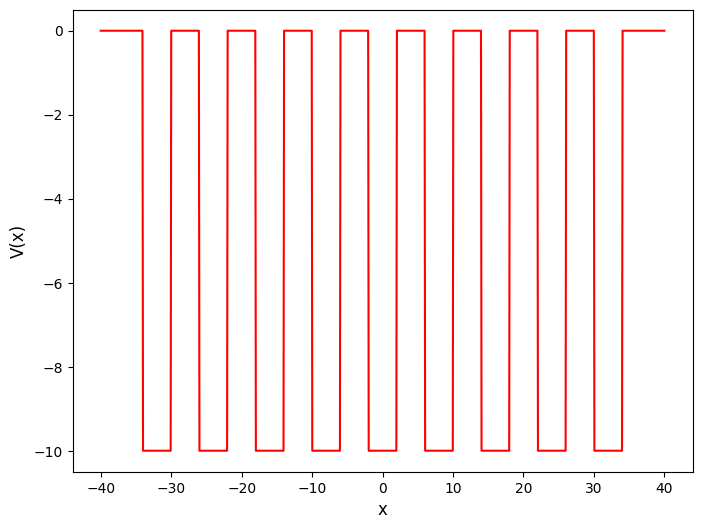

In [18]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

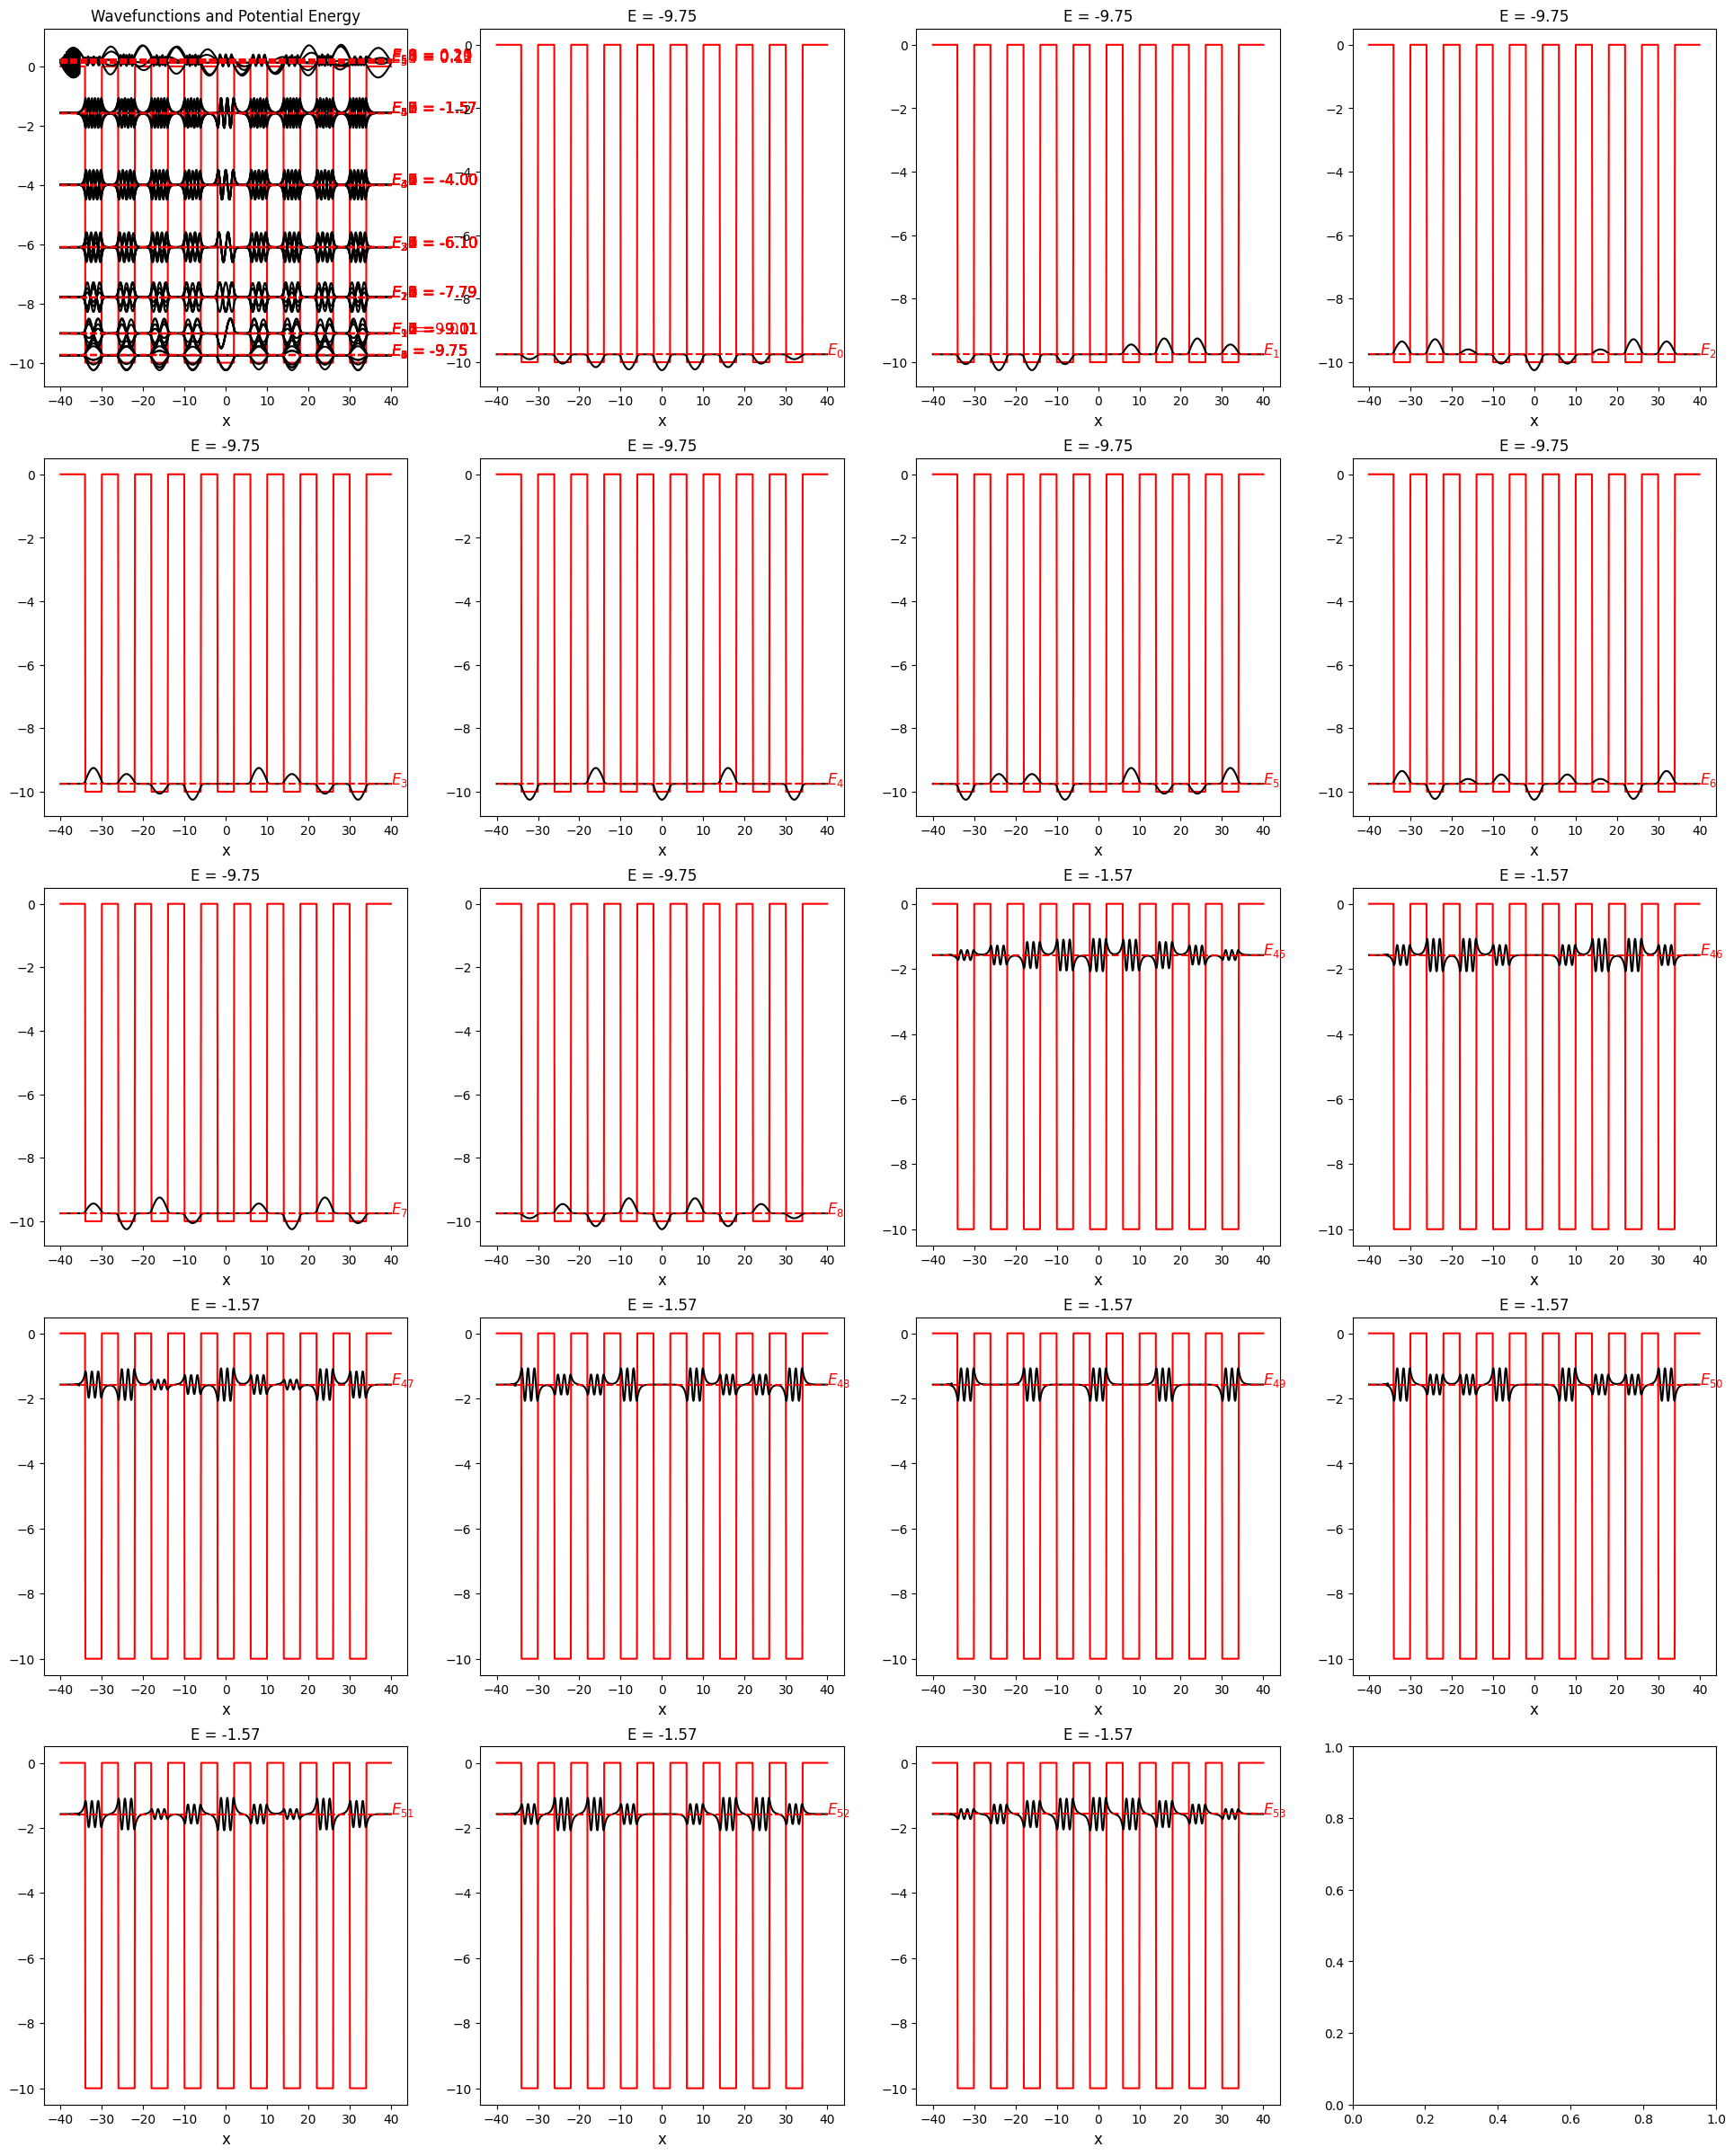

In [19]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 60, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(5, 4, figsize=(8*3, 6*5))
ax = ax.flatten()
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$ = {E[i]:.2f}' for i in range(E.size)], ax = ax[0])
for ii in range(0, 9):
    solver1D.plot_wavefunctions_and_potential(x, [E[ii]], [Psis[ii]], V_fun(x), labels = ['$E_{' + str(ii) + '}$',], ax = ax[ii+1], title=f'E = {E[ii]:.2f}')
for ii in range(9, 18):
    solver1D.plot_wavefunctions_and_potential(x, [E[ii + 4*9]], [Psis[ii + 4*9]], V_fun(x), labels = ['$E_{' + str(ii + 4*9) + '}$',], ax = ax[ii+1], title=f'E = {E[ii + 4*9]:.2f}')